In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import regressions as reg
import numpy as np
sns.set_theme()
energy_table = pd.read_csv('../BDD/energy.csv', sep=';')
energy_table = energy_table[energy_table.Code=='CHN']
gdp_table = pd.read_csv('../BDD/gdp-per-capita-maddison-2020.csv')
gdp_table = gdp_table[gdp_table.Code=='CHN']
pop_table = pd.read_csv('../BDD/population.csv', sep=';')
pop_table = pop_table[pop_table.Code=='CHN']
CH_table = pd.merge(gdp_table, pop_table, on=['Year'])
CH_table = pd.merge(CH_table, energy_table, on=['Year'])

energy_table = pd.read_csv('../BDD/energy.csv', sep=';')
energy_table = energy_table[energy_table.Code=='IND']
gdp_table = pd.read_csv('../BDD/gdp-per-capita-maddison-2020.csv')
gdp_table = gdp_table[gdp_table.Code=='IND']
pop_table = pd.read_csv('../BDD/population.csv', sep=';')
pop_table = pop_table[pop_table.Code=='IND']
IN_table = pd.merge(gdp_table, pop_table, on=['Year'])
IN_table = pd.merge(IN_table, energy_table, on=['Year'])

energy_table = pd.read_csv('../BDD/energy.csv', sep=';')
energy_table = energy_table[energy_table.Code=='BRA']
gdp_table = pd.read_csv('../BDD/gdp-per-capita-maddison-2020.csv')
gdp_table = gdp_table[gdp_table.Code=='BRA']
pop_table = pd.read_csv('../BDD/population.csv', sep=';')
pop_table = pop_table[pop_table.Code=='BRA']
BRA_table = pd.merge(gdp_table, pop_table, on=['Year'])
BRA_table = pd.merge(BRA_table, energy_table, on=['Year'])


energy_table = pd.read_csv('../BDD/energy.csv', sep=';')
energy_table = energy_table[energy_table.Code=='RUS']
gdp_table = pd.read_csv('../BDD/gdp-per-capita-maddison-2020.csv')
gdp_table = gdp_table[gdp_table.Code=='RUS']
pop_table = pd.read_csv('../BDD/population.csv', sep=';')
pop_table = pop_table[pop_table.Code=='RUS']
RUS_table = pd.merge(gdp_table, pop_table, on=['Year'])
RUS_table = pd.merge(RUS_table, energy_table, on=['Year'])

energy_table = pd.read_csv('../BDD/UK/primary-energy-consumption.csv', sep=';')
gdp_table = pd.read_csv('../BDD/gdp-per-capita-maddison-2020.csv')
gdp_table = gdp_table[gdp_table.Code=='GBR']
pop_table = pd.read_csv('../BDD/population.csv', sep=';')
pop_table = pop_table[pop_table.Code=='GBR']
UK_table = pd.merge(gdp_table, pop_table, on=['Year'])
UK_table = pd.merge(UK_table, energy_table, on=['Year'])

UK_table.columns


Index(['Entity_x', 'Code_x', 'Year', 'GDP per capita', '145446-annotations',
       'Entity_y', 'Code_y', 'Total population (Gapminder, HYDE & UN)',
       'Energy (PetaJoules)', 'Energy (TWh)'],
      dtype='object')

In [2]:
ch_en = CH_table['Primary energy consumption (TWh)']
ch_gdpc = CH_table['GDP per capita']
ch_pop = CH_table['Total population (Gapminder, HYDE & UN)']
ch_gdp = ch_gdpc*ch_pop
in_en = IN_table['Primary energy consumption (TWh)']
in_gdpc = IN_table['GDP per capita']
in_pop = IN_table['Total population (Gapminder, HYDE & UN)']
in_gdp = in_gdpc*in_pop
bra_en = BRA_table['Primary energy consumption (TWh)']
bra_gdpc = BRA_table['GDP per capita']
bra_pop = BRA_table['Total population (Gapminder, HYDE & UN)']
bra_gdp = bra_gdpc*bra_pop
rus_en = RUS_table['Primary energy consumption (TWh)']
rus_gdpc = RUS_table['GDP per capita']
rus_pop = RUS_table['Total population (Gapminder, HYDE & UN)']
rus_gdp = rus_gdpc*rus_pop

uk_en = UK_table['Energy (TWh)']
uk_gdpc = UK_table['GDP per capita']
uk_pop = UK_table['Total population (Gapminder, HYDE & UN)']
uk_gdp = uk_gdpc*uk_pop
year_uk = UK_table['Year']
year = BRA_table['Year']
yplot = np.linspace(year.min(), year.max(), 200)

Text(0, 0.5, 'Energy (TWh)')

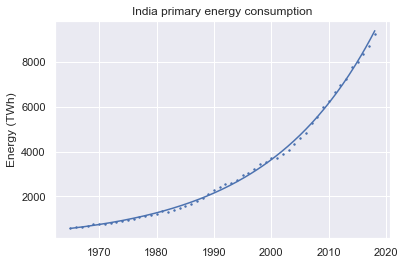

In [3]:
plt.scatter(year, in_en, label= 'India', s=2)
r, y0 = reg.expReg(year, in_en)
plt.plot(yplot, reg.exp_fun(yplot, r=r, y0=y0))
plt.title("India primary energy consumption")
plt.ylabel("Energy (TWh)")


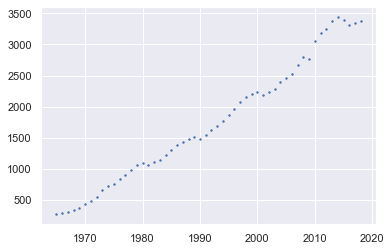

In [4]:
plt.scatter(year, bra_en, s=2)

Text(0.5, 1.0, 'Energy intensity (TWh/$)')

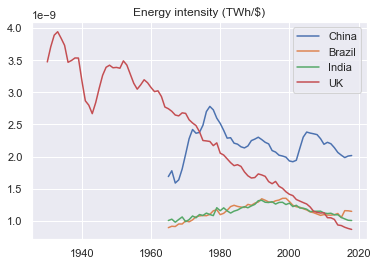

In [5]:
plt.plot(year, ch_en/ch_gdp, label='China')
plt.plot(year, bra_en/bra_gdp, label='Brazil')
plt.plot(year, in_en/in_gdp, label='India')
plt.plot(year_uk[130:], uk_en[130:]/uk_gdp[130:], label='UK')
plt.legend()
plt.title("Energy intensity (TWh/$)")


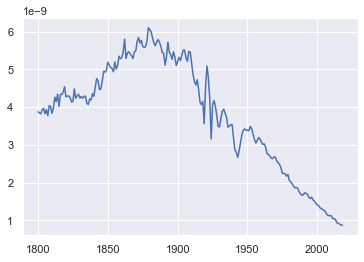

In [6]:
plt.plot(year_uk, uk_en/uk_gdp)

In [7]:
def energy_efficiency(countries = ['FRA', 'GBR', 'CHN', 'DEU', 'CAN', 'JPN',  'USA', 'OWID_WRL' ]) :

    sns.set_theme(style='whitegrid')
    energy_p = pd.read_csv('../BDD/energy-iea-bis.csv', sep=';', encoding='latin1')
    energy_f = pd.read_csv('../BDD/energy-final.csv', sep=';')

    merged_data= pd.merge(energy_p, energy_f, on=['Year'])
    merged_data = merged_data[merged_data.Code_x == merged_data.Code_y]

    
    for code in countries : 
        tab = merged_data[merged_data.Code_x==code].sort_values(by = 'Year')
       
        year = tab['Year']
        primary = np.array(tab['Energy'])
        final = np.array(tab['Final energy consumption (pJ)'])
        
        plt.plot(year, final/primary, label = code)
        plt.legend()

    return tab


,Entity_x,Code_x,Year,Energy,Entity_y,Code_y,Final energy consumption (pJ)
55,World,OWID_WRL,1973,255308.4703,World,OWID_WRL,351866
111,World,OWID_WRL,1977,282631.7052,World,OWID_WRL,384701
167,World,OWID_WRL,1981,299097.9727,World,OWID_WRL,390397
223,World,OWID_WRL,1985,323224.0519,World,OWID_WRL,407110
279,World,OWID_WRL,1989,360119.4830,World,OWID_WRL,465092
343,World,OWID_WRL,1993,373346.0317,World,OWID_WRL,499611
407,World,OWID_WRL,1997,399721.4334,World,OWID_WRL,547830
471,World,OWID_WRL,2001,423636.3276,World,OWID_WRL,587808
535,World,OWID_WRL,2005,481247.6799,World,OWID_WRL,672419
599,World,OWID_WRL,2009,509685.0845,World,OWID_WRL,708330


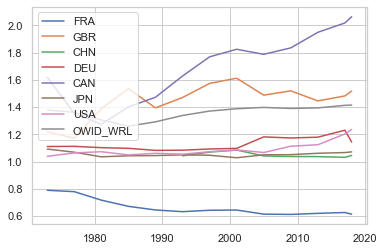

In [8]:
energy_efficiency()

In [9]:
energy_p = pd.read_csv('../BDD/energy-iea-bis.csv', sep=';', encoding='latin1')

In [10]:
energy_p.columns

Index(['Entity', 'Code', 'Year', 'Energy'], dtype='object')

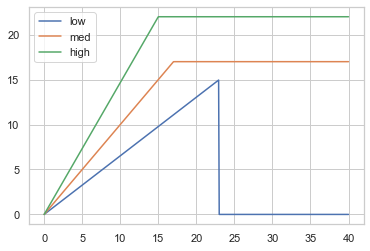